# **Research Questions and Analysis**

##### After doing our individual EDAs and getting more insight on the different variables in our dataset and how they relate to each other, we have narrowed our research down 
##### to the following two questions: 

##### ***RQ 1. What factors affect the insurance cost and how do they correlate to it?***
##### ***RQ 2. Which region is most affected by each of these factors? Is this region also the one with the highest insurance costs?***

##### Both of these questions are relational in nature and are both focused on Insurance Costs as that is the most important variable of our dataset and also our main focus for analysis. 

## **Age and BMI vs. Insurance Cost**
##### After taking a brief look at our dataset in milestone 1, we suspected that an increase in Age and/or BMI would also cause an increase in Insurance Costs. Lets begin by analyzing these 2 variables first:

##### **The following are the graphs of Age and BMI against Insurance Cost:**


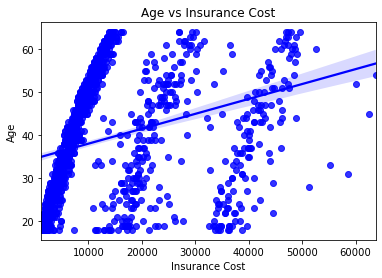

[Text(0.5, 1.0, 'BMI vs Insurance Cost')]

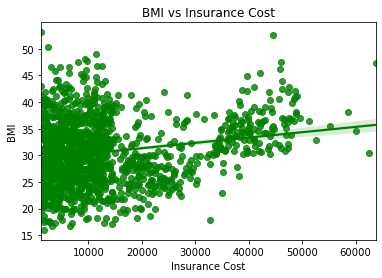

In [2]:
import pandas as pd
import numpy as np
from scripts import project_functions as pf
import seaborn as sns
import matplotlib.pyplot as plt

insurance_cleaned = pf.load_and_process("../../data/raw/insurance.csv")
sns.regplot(x = 'Insurance Cost', y = 'Age', data = insurance_cleaned, color = 'blue').set(title = "Age vs Insurance Cost")
plt.show()
sns.regplot(x = "Insurance Cost", y = "BMI", data = insurance_cleaned, color = 'green').set(title = "BMI vs Insurance Cost")

##### A scatterplot was chosen to show the comparison for both Age and BMI against Insurance Cost. This makes it easier to identify if there is any correlation between the two.

##### Graph 1 tells us that Age and Insurance Cost have a **Strong Positive Correlation** which is pretty evident by looking at the line of regression. This makes sense as old age can cause many medical problems, which leads to an increase in insurance costs.
##### Graph 2, however, is a little harder to analyze since the correlation, while present and positive, is not very strong. Being overweight or obese can lead to health problems which in turn increases insurance costs, but it is not very clear from the graph alone. **Lets take a look at the average values of the Insurance cost of all Weight Classes:**

In [4]:
# From project_functions, find average Insurance costs by Weight class. 

pf.insurance_avg_by_weight(insurance_cleaned)

,Insurance Cost
Weight Class,
Underweight,10126.660345
Normal,10379.499685
Overweight,11000.079203
Obese,15585.776676


##### There is a substantial increase in Insurance Cost as we go down the "Weight Class" column. Therefore, we can consider BMI to be another factor affecting the Insurance Cost.

## **Number of Children and Smokers vs. Insurance Cost**

##### Now that we have tested the variables that we suspected, it is time to check for the others too. 

##### Below is a table with the average Insurance Cost against the number of children. 

In [3]:
# From project_functions, find average Insurance costs by Number of Children. 

pf.insurance_avg_by_child(insurance_cleaned)

,Insurance Cost
Children,
5,8786.035556
0,12365.975610
1,12731.171728
4,13850.656800
2,15073.563833
3,15355.318408


##### Unlike the previous table, Insurance cost does NOT increase as number of children increases. Therefore, number of children do not seem to influence Insurance Cost at all.

##### **Now, let's check if being a smoker affects one's medical costs:**

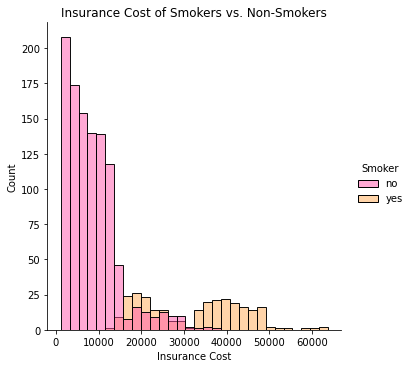

In [6]:
sns.displot(data = insurance_cleaned, x = "Insurance Cost", hue = "Smoker", palette = 'spring').set(title = "Insurance Cost of Smokers vs. Non-Smokers")

##### The Histogram above shows us that almost all of the non-smokers have much lower insurance costs, and the opposite for the smokers, which means being a smoker is a factor that affects insurance cost. This result also seems valid as smoking can cause serious respiratory issues, which can increase medical costs.

##### From our analysis, we can now list the factors that affect Insurance costs, and how strong their correlation is:
##### 1. **Age - Strong Positive Correlation**
##### 2. **BMI - Weak Positive Correlation**
##### 3. **Smoker - Strong Positive Correlation**

##### This answers our *RQ 1*, and now we can move on to *RQ 2* and examine regional insurance costs, and which region is most affected by each of the factors listed above.


##### Lets start with smokers vs. non-smokers. **Here is a count plot showcasing which region has the highest number of smokers and non-smokers:**

<AxesSubplot:xlabel='Smoker', ylabel='count'>

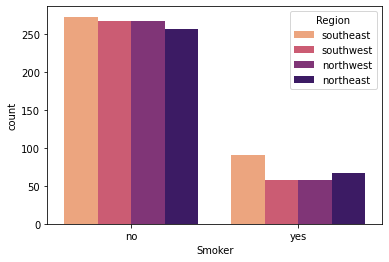

In [7]:
sns.countplot(x = 'Smoker', data = insurance_cleaned, palette = 'magma_r', hue = "Region")

##### It is clear that the 'South-east' region has the highest amount of smokers. The number of non-smokers is almost even across all region. This information will be useful in the end after we compare the remaining 2 factors.

##### **The following graph represents the people in each region by their weight class:**

<AxesSubplot:xlabel='count', ylabel='Region'>

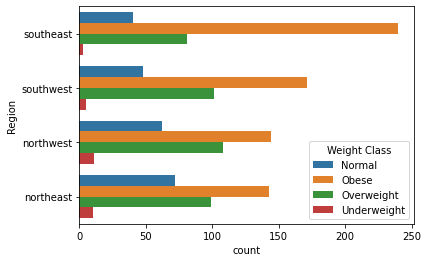

In [8]:
sns.countplot(y = "Region", hue = "Weight Class", data = insurance_cleaned)

##### Again, the 'South-east' region has the highest number of Obese people by a large margin. Now we only need to check for the region with the oldest citizens before we are able to answer our *RQ 2*

##### **The Following graph shows a representation of different Age groups across each region:**

[Text(0.5, 1.0, 'Age Group Representation in Different Regions')]

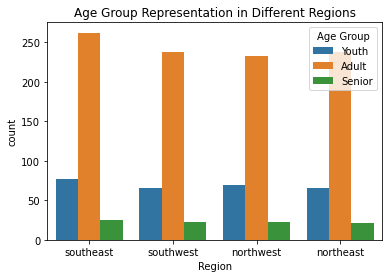

In [9]:
sns.countplot(x = "Region", hue = "Age Group", data = insurance_cleaned).set(title = "Age Group Representation in Different Regions")

##### Once again, the 'South East' Region has the highest number of Senior Citizens, as well as adults who are older than 24. Since the 'South-east' region is most affected by all 3 factors, we predict that it it also the region with the highest average insurance cost. Lets find out; **The following is the table showcasing average insurance costs across each region:**

In [4]:
# From project_functions, find average Insurance costs by Region. 

pf.insurance_avg_by_region(insurance_cleaned)

,Insurance Cost
Region,
southwest,12346.937508
northwest,12417.575169
northeast,13406.384599
southeast,14735.411484


##### Our prediction was correct; The 'South-east' region has the highest average insurance cost since all 3 factors that affect insurance cost are most prevalent in that region. Therefore, our *RQ 2* has also been answered.

#### In conclusion, we found out that:

### ***A1. The factors that affect insurance cost are Age, BMI and Smoker. Age and Smoker have a strong positive correlation to insurance cost, while BMI has a weak positive correlation.***
### ***A2. The 'South-East' region is the most affected by ALL 3 of the above factors. It is also the region with the highest average insurance cost.***